In [ ]:
import os
import json
import zipfile
import requests
from PIL import Image
from io import BytesIO
from google.colab import files, drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import json
import pandas as pd

# Define dataset paths
DATASET_DIR = "/content/drive/MyDrive/DS8013 Deep Learning/Project"
IMAGE_DIR_TRAIN = os.path.join(DATASET_DIR, "scene_img_abstract_v002_train2015")
IMAGE_DIR_VAL = os.path.join(DATASET_DIR, "scene_img_abstract_v002_val2015")
IMAGE_DIR_TEST = os.path.join(DATASET_DIR, "scene_img_abstract_v002_test2015")

# JSON file paths
QUESTIONS_TRAIN_PATH = os.path.join(DATASET_DIR, "Questions_Train_abstract_v002/MultipleChoice_abstract_v002_train2015_questions.json")
QUESTIONS_VAL_PATH = os.path.join(DATASET_DIR, "Questions_Val_abstract_v002/MultipleChoice_abstract_v002_val2015_questions.json")
QUESTIONS_TEST_PATH = os.path.join(DATASET_DIR, "Questions_Test_abstract_v002/MultipleChoice_abstract_v002_test2015_questions.json")

ANSWERS_TRAIN_PATH = os.path.join(DATASET_DIR, "Annotations_Train_abstract_v002/abstract_v002_train2015_annotations.json")
ANSWERS_VAL_PATH = os.path.join(DATASET_DIR, "Annotations_Val_abstract_v002/abstract_v002_val2015_annotations.json")

# Function to load JSON
def load_json(json_path):
    with open(json_path, "r") as file:
        return json.load(file)

# Load the JSON files
questions_train = load_json(QUESTIONS_TRAIN_PATH)
questions_val = load_json(QUESTIONS_VAL_PATH)
questions_test = load_json(QUESTIONS_TEST_PATH)

answers_train = load_json(ANSWERS_TRAIN_PATH)
answers_val = load_json(ANSWERS_VAL_PATH)

In [ ]:
def questions_to_dataframe(questions_json):
    data = []
    for item in questions_json["questions"]:
        data.append({
            "image_id": item["image_id"],
            "question_id": item["question_id"],
            "question": item["question"],
            "multiple_choices": item["multiple_choices"]
        })
    return pd.DataFrame(data)

df_questions_train = questions_to_dataframe(questions_train)
df_questions_val = questions_to_dataframe(questions_val)
df_questions_test = questions_to_dataframe(questions_test)

# Check the structure
df_questions_train.head()


,image_id,question_id,question,multiple_choices
0,11779,117792,Who looks happier?,"[alive, 1, woman, purple, 2, yes, white, boy, ..."
1,11779,117790,Where is the woman sitting?,"[3, no, blue, red, 1, slide, monkey bars, jump..."
2,11779,117791,Where is the man sitting?,"[away, yes, blue, 1, 2, mouse, couch, no, yell..."
3,5536,55360,Is this man hungry?,"[water, yellow, 4, running, blue, pouring, out..."
4,5536,55361,What kind of drink is that?,"[wine, girl would fall, soda, white, yes, coke..."


In [ ]:
def annotations_to_dataframe(annotations_json):
    data = []
    for item in annotations_json["annotations"]:
        data.append({
            "image_id": item["image_id"],
            "question_id": item["question_id"],
            "multiple_choice_answer": item["multiple_choice_answer"],
            "answers": [ans["answer"] for ans in item["answers"]],
            "answer_type": item["answer_type"],
            "question_type": item["question_type"]
        })
    return pd.DataFrame(data)

df_answers_train = annotations_to_dataframe(answers_train)
df_answers_val = annotations_to_dataframe(answers_val)

# Check the structure
df_answers_train.head()


,image_id,question_id,multiple_choice_answer,answers,answer_type,question_type
0,11779,117792,man,"[old person, man, man, man, old man, man, man,...",other,who
1,11779,117790,blanket,"[on blanket, blanket, on blanket, blanket, pic...",other,where is the
2,11779,117791,bench,"[on bench, bench, on bench, bench, bench, on b...",other,where is the
3,5536,55360,yes,"[yes, yes, yes, yes, yes, yes, yes, yes, yes, ...",yes/no,is this
4,5536,55361,soda,"[water, soda, wine, soft, soda, soda, soda, wa...",other,what kind of


In [ ]:
df_train = df_questions_train.merge(df_answers_train, on=["image_id", "question_id"])
df_val = df_questions_val.merge(df_answers_val, on=["image_id", "question_id"])

# print merged train data
df_train.head()


,image_id,question_id,question,multiple_choices,multiple_choice_answer,answers,answer_type,question_type
0,11779,117792,Who looks happier?,"[alive, 1, woman, purple, 2, yes, white, boy, ...",man,"[old person, man, man, man, old man, man, man,...",other,who
1,11779,117790,Where is the woman sitting?,"[3, no, blue, red, 1, slide, monkey bars, jump...",blanket,"[on blanket, blanket, on blanket, blanket, pic...",other,where is the
2,11779,117791,Where is the man sitting?,"[away, yes, blue, 1, 2, mouse, couch, no, yell...",bench,"[on bench, bench, on bench, bench, bench, on b...",other,where is the
3,5536,55360,Is this man hungry?,"[water, yellow, 4, running, blue, pouring, out...",yes,"[yes, yes, yes, yes, yes, yes, yes, yes, yes, ...",yes/no,is this
4,5536,55361,What kind of drink is that?,"[wine, girl would fall, soda, white, yes, coke...",soda,"[water, soda, wine, soft, soda, soda, soda, wa...",other,what kind of


In [ ]:
image_to_question_id = {}
for question in questions_train['questions']:
    image_id = question['image_id']
    question_id = question['question_id']
    image_to_question_id[image_id] = question_id


# 1. Dataset Size Summary



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import PIL.Image as Image

# Count summaries
print("Training Annotations:", len(df_answers_train))
print("Validation Annotations:", len(df_answers_val))
print("Training Questions:", len(df_questions_train))
print("Validation Questions:", len(df_questions_val))
print("Testing Questions:", len(df_questions_test))
print("Training Images:", len(os.listdir(IMAGE_DIR_TRAIN)))
print("Validation Images:", len(os.listdir(IMAGE_DIR_VAL)))
print("Testing Images:", len(os.listdir(IMAGE_DIR_TEST)))


Training Annotations: 60000
Validation Annotations: 30000
Training Questions: 60000
Validation Questions: 30000
Testing Questions: 60000
Training Images: 20000
Validation Images: 10000
Testing Images: 20000


In [ ]:
import numpy as np

# 2. Quesion Analysis

<ipython-input-10-6b6031efb90b>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_qs.values, y=top_qs.index, palette="viridis")


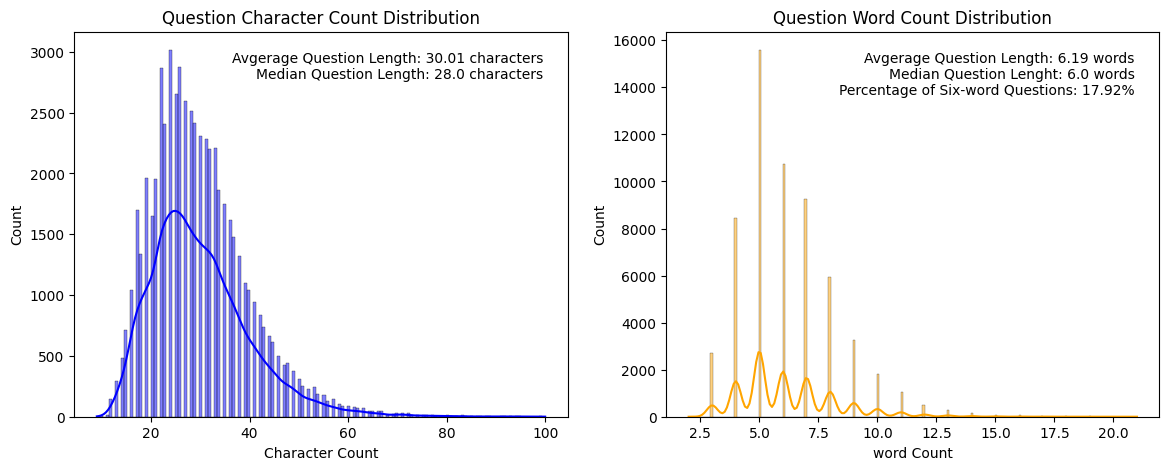

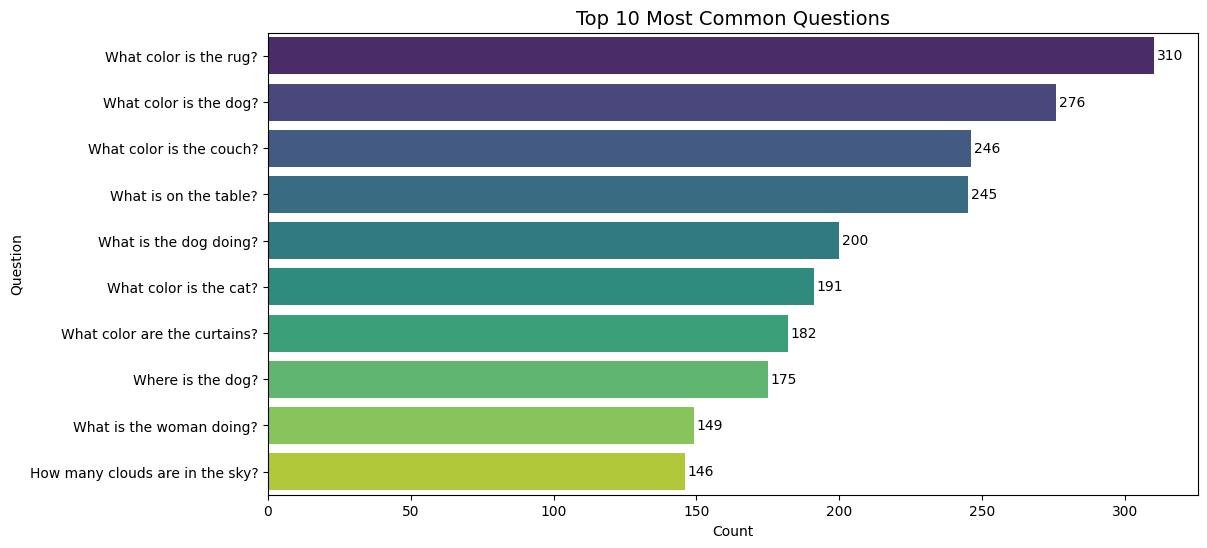

<ipython-input-10-6b6031efb90b>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


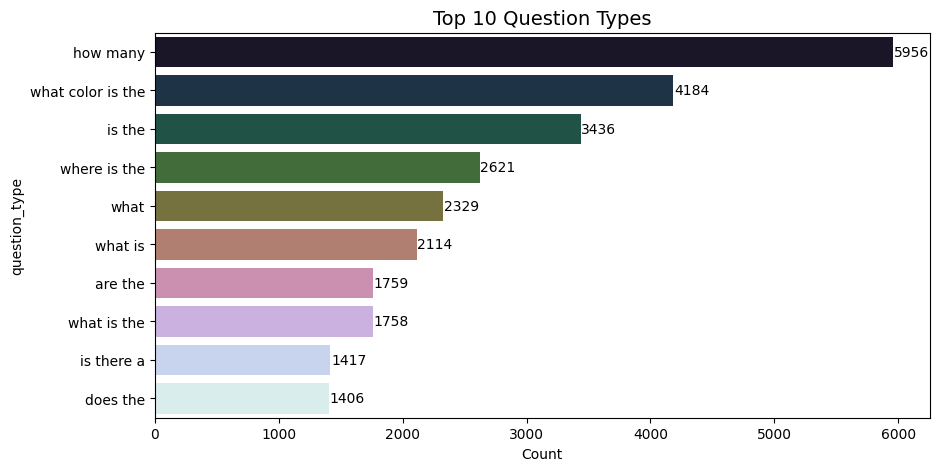

In [ ]:
# Question and Answer Length Distribution
question_char_count = df_train['question'].apply(len)
question_word_count = df_train['question'].apply(lambda x: len(x.split()))

# Calculate statistics
avg_char_len = np.mean(question_char_count)
median_char_len = np.median(question_char_count)
#perc_6_char = np.sum(question_char_count == 6) / len(question_char_count) * 100

avg_word_len = np.mean(question_word_count)
median_word_len = np.median(question_word_count)
perc_6_word = np.sum(question_word_count == 6) / len(question_word_count) * 100

# Plotting distributions for question lengths
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Question Character Count Distribution
sns.histplot(question_char_count, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Question Character Count Distribution')
axes[0].set_xlabel("Character Count")

# Add statistics text to the plot
stats_text = f"Avgerage Question Length: {avg_char_len:.2f} characters\nMedian Question Length: {median_char_len} characters"
axes[0].text(0.95, 0.95, stats_text, transform=axes[0].transAxes, ha='right', va='top')


# Question Word Count Distribution
sns.histplot(question_word_count, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Question Word Count Distribution')
axes[1].set_xlabel("word Count")

# Add statistics text to the plot
stats_text = f"Avgerage Question Length: {avg_word_len:.2f} words\nMedian Question Lenght: {median_word_len} words\nPercentage of Six-word Questions: {perc_6_word:.2f}%"
axes[1].text(0.95, 0.95, stats_text, transform=axes[1].transAxes, ha='right', va='top')

# Top 10 common questions
plt.figure(figsize=(12, 6))
top_qs = df_train["question"].value_counts().head(10)
sns.barplot(x=top_qs.values, y=top_qs.index, palette="viridis")
for index, value in enumerate(top_qs.values):
    plt.text(value + 1, index, str(value), va='center')
plt.title("Top 10 Most Common Questions", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Question")
plt.show()

# Get the top 10 question types
plt.figure(figsize=(10, 5))
top_10_question_types = df_train["question_type"].value_counts().nlargest(10).index

sns.countplot(
    data=df_train,
    y="question_type",
    order=top_10_question_types,  # Use the top 10 question types
    palette="cubehelix"
)

plt.title("Top 10 Question Types", fontsize=14)  # Update title
plt.xlabel("Count")

# Add count labels for the top 10
for i, v in enumerate(df_train["question_type"].value_counts().loc[top_10_question_types]):  # Filter counts to top 10
    plt.text(v + 5, i, str(v), va='center')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# 3. Answer Analysis

<ipython-input-12-cfbf5188709a>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=values, palette="crest", edgecolor='black')  # Store the axis object


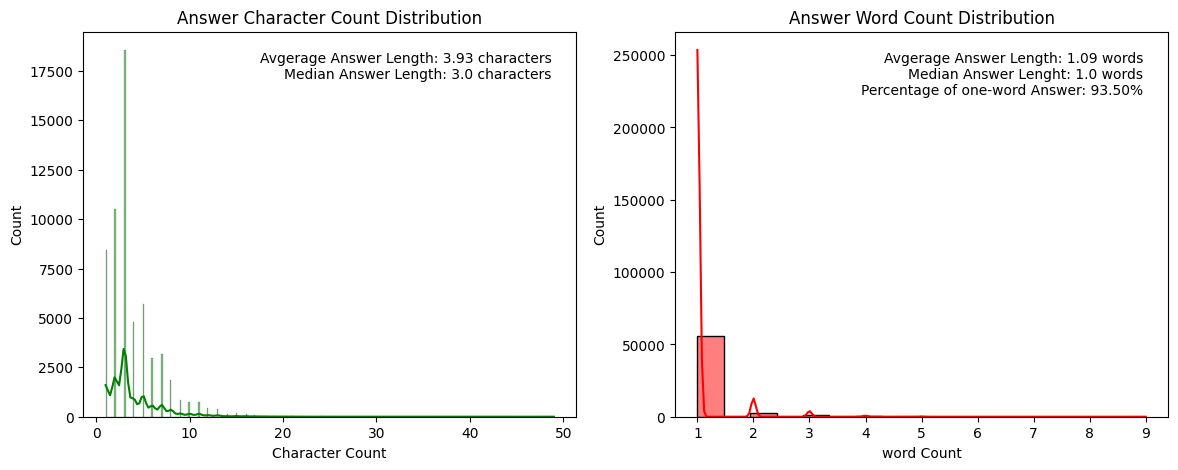

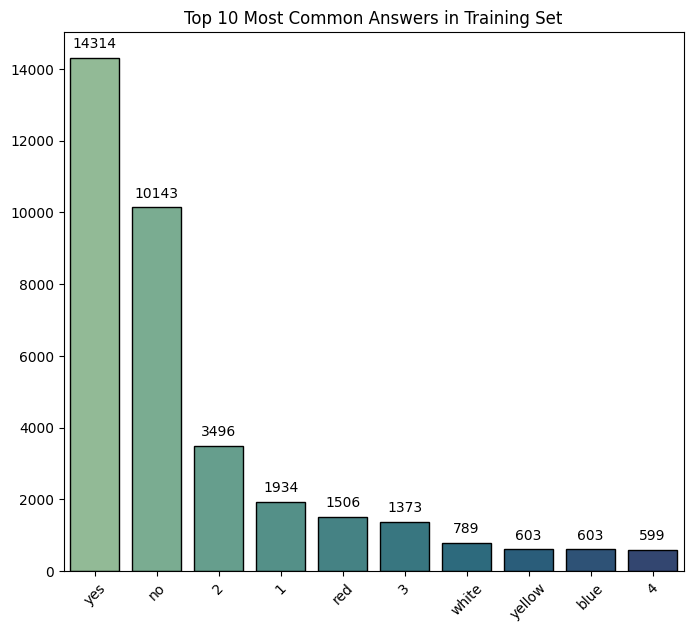

<ipython-input-12-cfbf5188709a>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, y="answer_type", order=df_train["answer_type"].value_counts().index, palette="coolwarm")


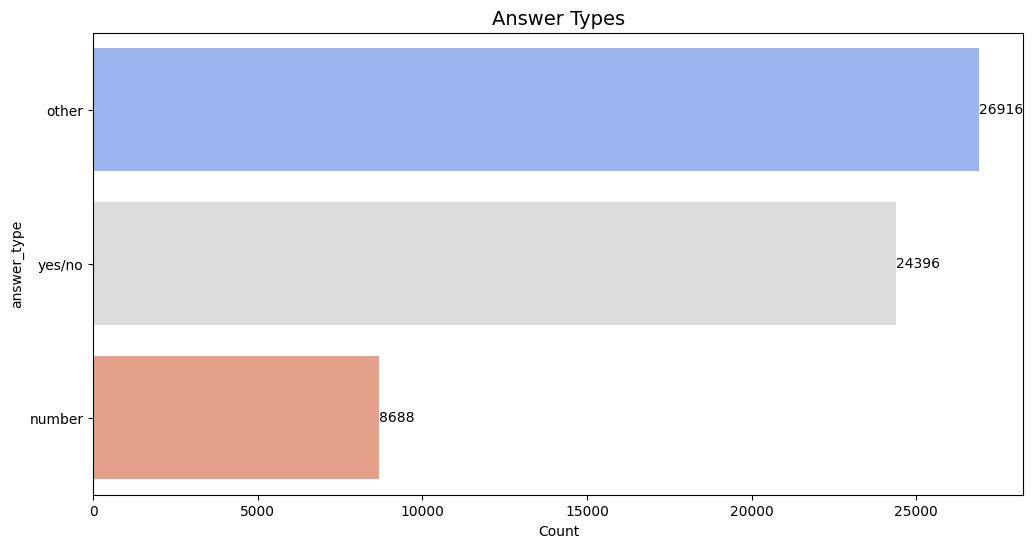

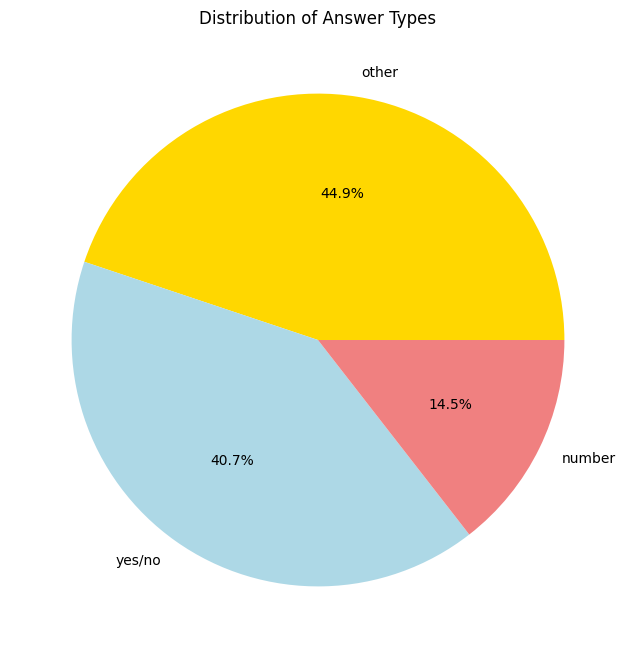

In [ ]:
answer_char_count = df_train['multiple_choice_answer'].apply(len)
answer_word_count = df_train['multiple_choice_answer'].apply(lambda x: len(x.split()))

# Calculate statistics
avg_char_len = np.mean(answer_char_count)
median_char_len = np.median(answer_char_count)
#perc_3_char = np.sum(answer_char_count == 3) / len(answer_char_count) * 100

avg_word_len = np.mean(answer_word_count)
median_word_len = np.median(answer_word_count)
perc_1_word = np.sum(answer_word_count == 1) / len(answer_word_count) * 100

# Plotting distributions for question lengths
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Answer Character Count Distribution
sns.histplot(answer_char_count, kde=True, ax=axes[0], color='green')
axes[0].set_title('Answer Character Count Distribution')
axes[0].set_xlabel("Character Count")

# Add statistics text to the plot
stats_text = f"Avgerage Answer Length: {avg_char_len:.2f} characters\nMedian Answer Length: {median_char_len} characters"
axes[0].text(0.95, 0.95, stats_text, transform=axes[0].transAxes, ha='right', va='top')


# Question Word Count Distribution
sns.histplot(answer_word_count, kde=True, ax=axes[1], color='red')
axes[1].set_title('Answer Word Count Distribution')
axes[1].set_xlabel("word Count")

# Add statistics text to the plot
stats_text = f"Avgerage Answer Length: {avg_word_len:.2f} words\nMedian Answer Lenght: {median_word_len} words\nPercentage of one-word Answer: {perc_1_word:.2f}%"
axes[1].text(0.95, 0.95, stats_text, transform=axes[1].transAxes, ha='right', va='top')

# Top 10 frequent answers
answer_counts = Counter(df_train["multiple_choice_answer"])
most_common_answers = answer_counts.most_common(10)

# Plot distribution
labels, values = zip(*most_common_answers)
plt.figure(figsize=(8, 7))
ax = sns.barplot(x=labels, y=values, palette="crest", edgecolor='black')  # Store the axis object

plt.xticks(rotation=45)
plt.title("Top 10 Most Common Answers in Training Set")

# Add value counts on top of bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

# Answer types
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train, y="answer_type", order=df_train["answer_type"].value_counts().index, palette="coolwarm")
plt.title("Answer Types", fontsize=14)
plt.xlabel("Count")
for i, v in enumerate(df_train["answer_type"].value_counts()):
    plt.text(v + 5, i, str(v), va='center')
plt.show()

# Answer type distribution
answer_type_counts = df_train["answer_type"].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(answer_type_counts, labels=answer_type_counts.index, autopct="%1.1f%%", colors=['gold', 'lightblue', 'lightcoral'])
plt.title("Distribution of Answer Types")
plt.show()


# 4. Image & Question Distribution

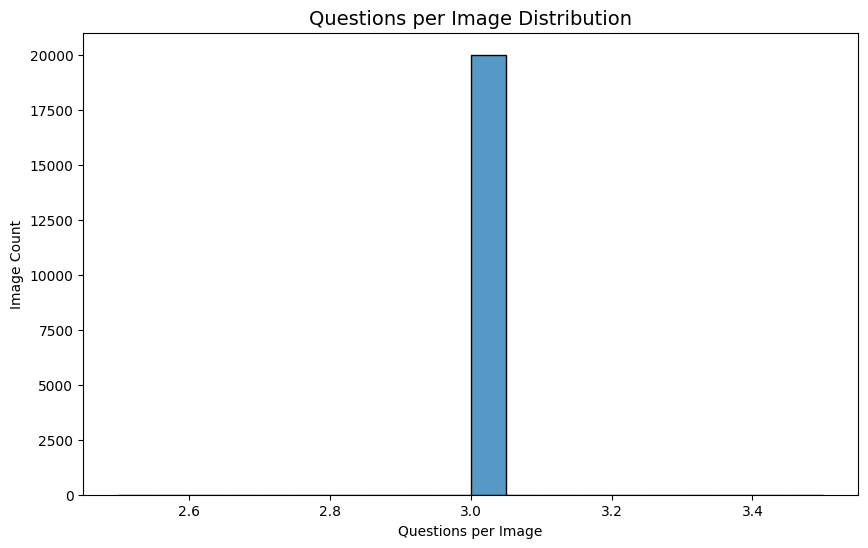

abstract_v002_train2015_000000018991.png: size = (700, 400)
abstract_v002_train2015_000000018982.png: size = (700, 400)
abstract_v002_train2015_000000019002.png: size = (700, 400)
abstract_v002_train2015_000000018971.png: size = (700, 400)
abstract_v002_train2015_000000019031.png: size = (700, 400)


In [ ]:
# Number of questions per image
image_question_count = df_train["image_id"].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(image_question_count, bins=20)
plt.title("Questions per Image Distribution", fontsize=14)
plt.xlabel("Questions per Image")
plt.ylabel("Image Count")
plt.show()

# Image size check (just a few samples)
sample_images = os.listdir(IMAGE_DIR_TRAIN)[:5]
for img_name in sample_images:
    img_path = os.path.join(IMAGE_DIR_TRAIN, img_name)
    img = Image.open(img_path)
    print(f"{img_name}: size = {img.size}")


Number of training images: 20000
Number of validation images: 10000
Number of unique images in training set: 20000


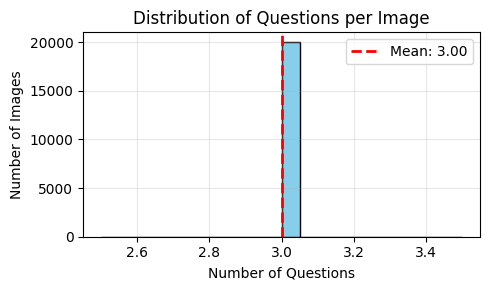

Average questions per image: 3.00
Maximum questions for a single image: 3
Minimum questions for a single image: 3
abstract_v002_train2015_000000018991.png: size = (700, 400)


In [ ]:
# Check if image directories exist
if os.path.exists(IMAGE_DIR_TRAIN):
    # Count images in each directory
    train_images = [f for f in os.listdir(IMAGE_DIR_TRAIN) if f.endswith('.png') or f.endswith('.jpg')]
    val_images = []
    if os.path.exists(IMAGE_DIR_VAL):
        val_images = [f for f in os.listdir(IMAGE_DIR_VAL) if f.endswith('.png') or f.endswith('.jpg')]

    print(f"Number of training images: {len(train_images)}")
    print(f"Number of validation images: {len(val_images)}")

    # Count unique images in the dataset
    unique_train_images = df_train['image_id'].nunique()
    print(f"Number of unique images in training set: {unique_train_images}")

    # Questions per image analysis
    questions_per_image = df_train.groupby('image_id').size()

    plt.figure(figsize=(5, 3))
    plt.hist(questions_per_image, bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution of Questions per Image')
    plt.xlabel('Number of Questions')
    plt.ylabel('Number of Images')
    plt.grid(True, alpha=0.3)
    plt.axvline(questions_per_image.mean(), color='red', linestyle='dashed', linewidth=2,
                label=f'Mean: {questions_per_image.mean():.2f}')
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"Average questions per image: {questions_per_image.mean():.2f}")
    print(f"Maximum questions for a single image: {questions_per_image.max()}")
    print(f"Minimum questions for a single image: {questions_per_image.min()}")


# Image size check (just a few samples)
sample_images = os.listdir(IMAGE_DIR_TRAIN)[:1]
for img_name in sample_images:
    img_path = os.path.join(IMAGE_DIR_TRAIN, img_name)
    img = Image.open(img_path)
    print(f"{img_name}: size = {img.size}")

# 5. Check for Dataset Imbalance

<ipython-input-90-fa41ff639a37>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_qtypes.index, y=top_qtypes.values, palette="crest", ax=axs[0])
<ipython-input-90-fa41ff639a37>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=atype_counts.index, y=atype_counts.values, palette="magma", ax=axs[1])


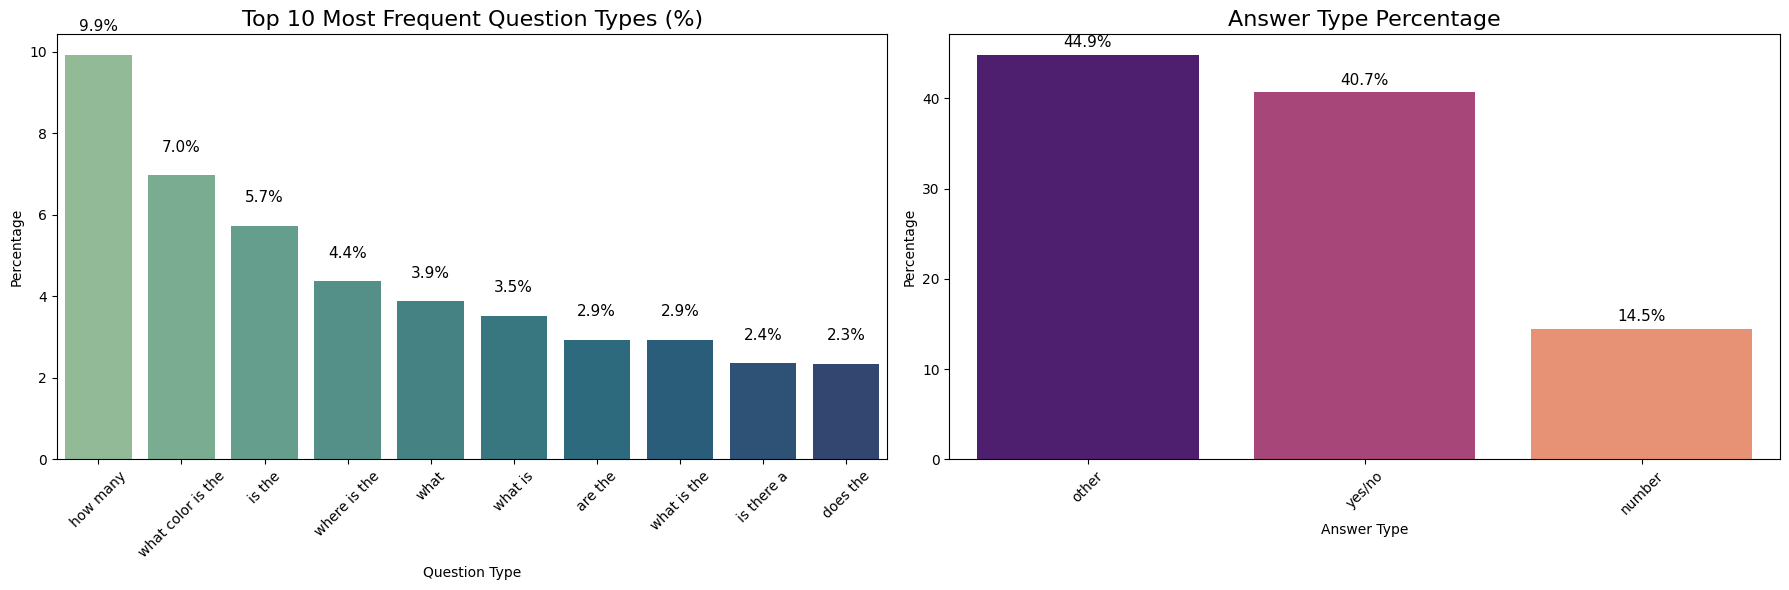

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate normalized (percentage) counts
qtype_counts = df_train["question_type"].value_counts(normalize=True) * 100
atype_counts = df_train["answer_type"].value_counts(normalize=True) * 100

# Plot setup
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Top 10 question types by percentage
top_qtypes = df_train["question_type"].value_counts(normalize=True).head(10) * 100

# Question Type Bar Plot (on the first subplot)
sns.barplot(x=top_qtypes.index, y=top_qtypes.values, palette="crest", ax=axs[0])
axs[0].set_title("Top 10 Most Frequent Question Types (%)", fontsize=16)
axs[0].set_ylabel("Percentage")
axs[0].set_xlabel("Question Type")
axs[0].tick_params(axis='x', rotation=45)

# Add value labels to the first subplot
for i, val in enumerate(top_qtypes.values):
    axs[0].text(i, val + 0.5, f"{val:.1f}%", ha='center', va='bottom', fontsize=11)

# Answer Type Bar Plot (on the second subplot)
sns.barplot(x=atype_counts.index, y=atype_counts.values, palette="magma", ax=axs[1])
axs[1].set_title("Answer Type Percentage", fontsize=16)
axs[1].set_ylabel("Percentage")
axs[1].set_xlabel("Answer Type")
axs[1].tick_params(axis='x', rotation=45)

# Add labels on top of bars for the second subplot
for i, val in enumerate(atype_counts.values):
    axs[1].text(i, val + 0.5, f"{val:.1f}%", ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

<ipython-input-14-d183922bec78>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=qcat_counts.index, y=qcat_counts.values, palette="Set2")


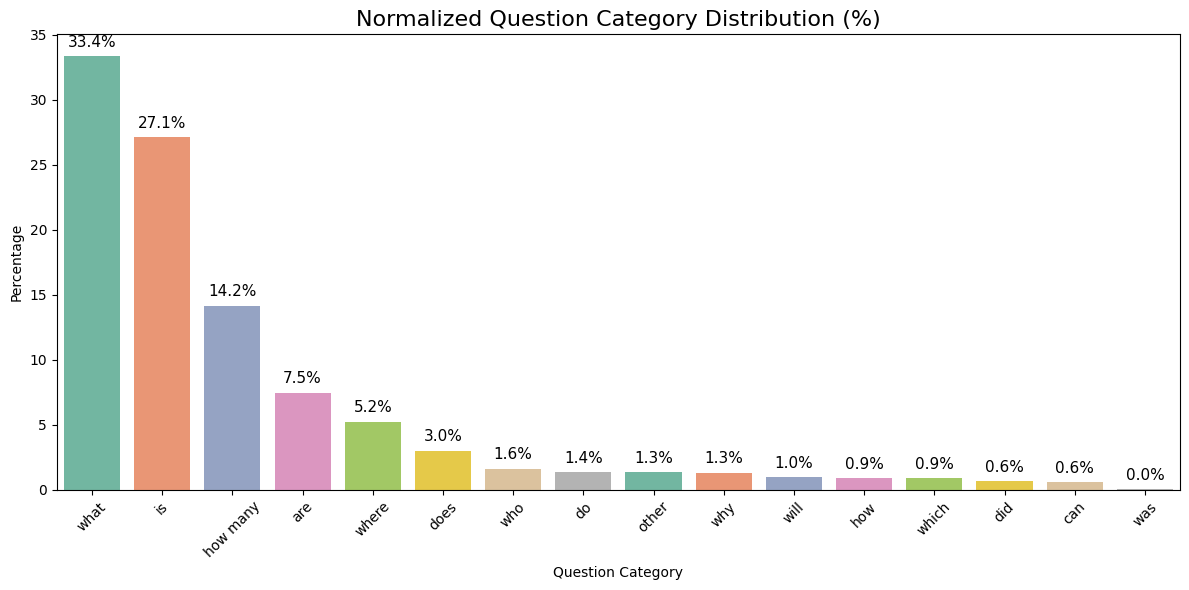

In [ ]:
import re

def extract_category(question):
    q = question.lower().strip()
    if q.startswith("how many"):
        return "how many"
    match = re.match(r"^(are|can|did|do|does|how|is|was|what|where|which|who|why|will)\b", q)
    if match:
        return match.group(1)
    return "other"

df_train["question_category"] = df_train["question"].apply(extract_category)

# Percentage of question categories
qcat_counts = df_train["question_category"].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 6))
sns.barplot(x=qcat_counts.index, y=qcat_counts.values, palette="Set2")
plt.title("Normalized Question Category Distribution (%)", fontsize=16)
plt.ylabel("Percentage")
plt.xlabel("Question Category")
plt.xticks(rotation=45)

# Add value labels
for i, val in enumerate(qcat_counts.values):
    plt.text(i, val + 0.5, f"{val:.1f}%", ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()


# 6. Question Type vs Answer Type

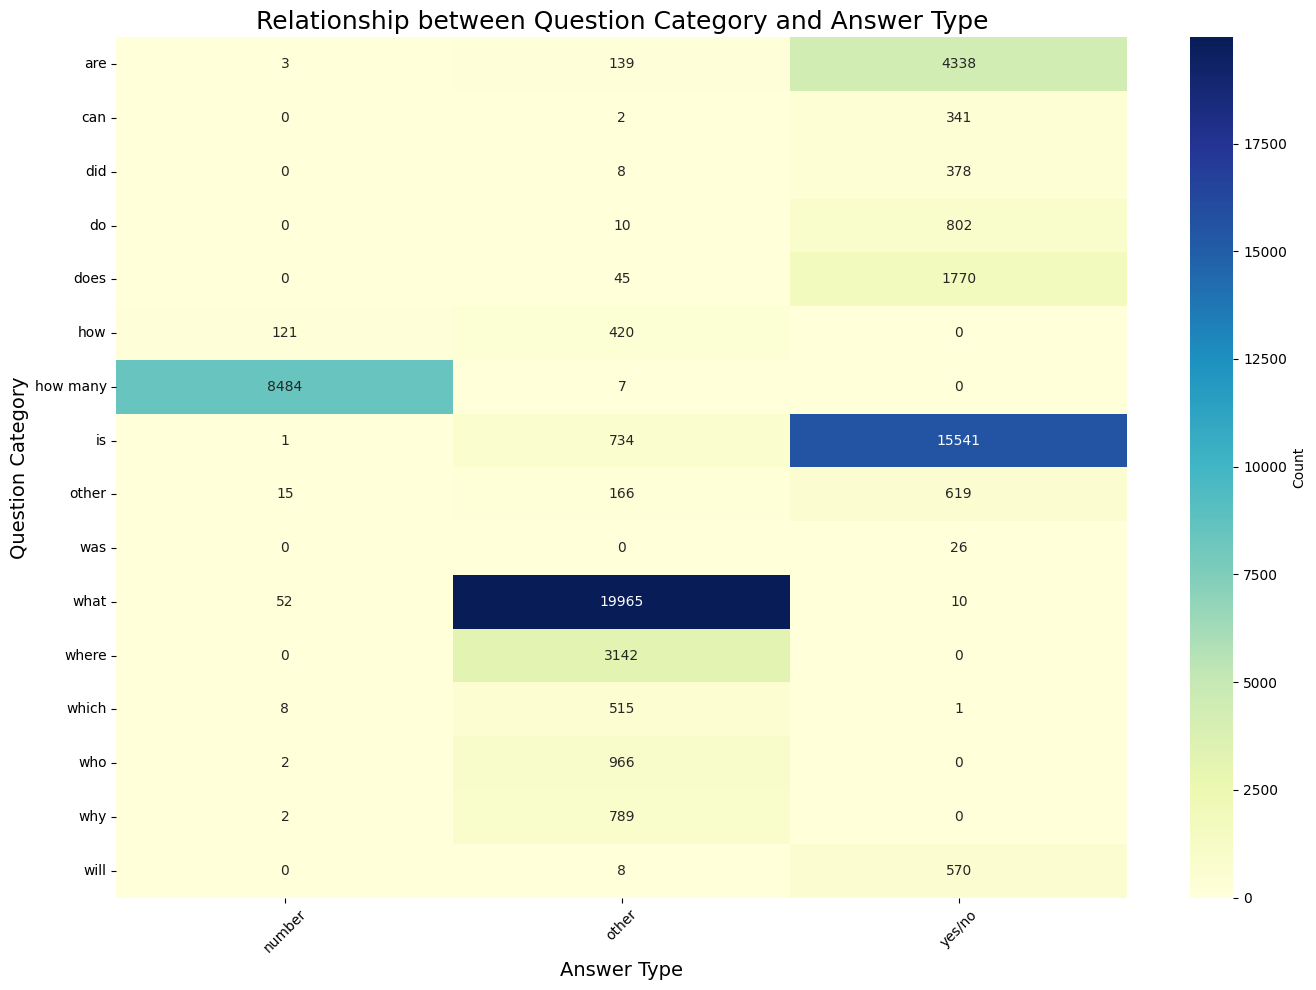

In [ ]:
import re

# Define normalized categories in desired order
question_categories = ["are", "can", "did", "do", "does", "how", "how many", "is", "other", "was", "what", "where", "which", "who", "why", "will"]

# Function to extract question category
def extract_category(question):
    q = question.lower().strip()

    # Specific patterns first
    if q.startswith("how many"):
        return "how many"

    match = re.match(r"^(are|can|did|do|does|how|is|was|what|where|which|who|why|will)\b", q)
    if match:
        return match.group(1)
    return "other"

# Apply function
df_train["question_category"] = df_train["question"].apply(extract_category)

# Crosstab and visualization
cross_tab = pd.crosstab(df_train["question_category"], df_train["answer_type"])

# Reindex to desired order
cross_tab = cross_tab.reindex(index=question_categories)

plt.figure(figsize=(14, 10))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Count'})
plt.title("Relationship between Question Category and Answer Type", fontsize=18)
plt.xlabel("Answer Type", fontsize=14)
plt.ylabel("Question Category", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


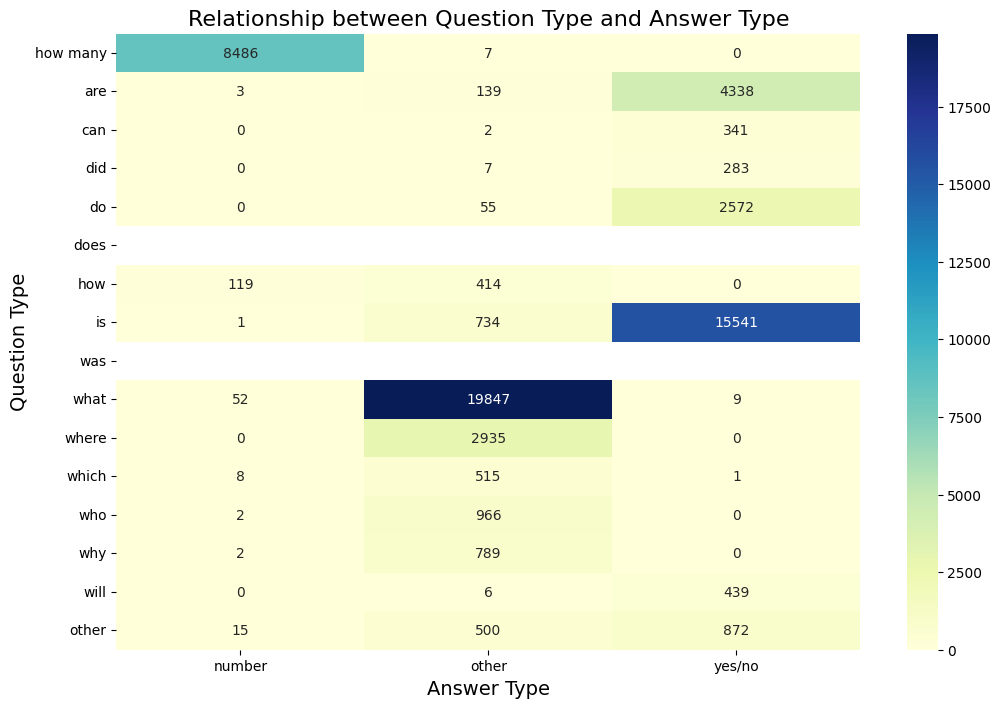

In [ ]:
# Define the desired question type tokens in the preferred order.
desired_tokens = ["how many", "are", "can", "did", "do", "does", "how", "is", "was", "what", "where", "which", "who", "why", "will"]

def map_question_type(qtype):
    q = qtype.lower().strip()
    # Check "how many" first to avoid matching "how"
    if q.startswith("how many"):
        return "how many"
    for token in desired_tokens:
        # Skip "how many" since it's already checked
        if token == "how many":
            continue
        if q.startswith(token):
            return token
    # If no match, classify as "other"
    return "other"

# Apply the mapping function
df_train["mapped_question_type"] = df_train["question_type"].apply(map_question_type)

# Create a cross-tabulation of the mapped question types vs answer types.
cross_tab = pd.crosstab(df_train["mapped_question_type"], df_train["answer_type"])

# Optional: Reorder rows to match the desired order plus any additional types.
ordered_qtypes = [token for token in desired_tokens] + \
                 [qt for qt in cross_tab.index if qt not in desired_tokens]
cross_tab = cross_tab.reindex(ordered_qtypes)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, fmt=".0f", cmap="YlGnBu") # Changed fmt to '.0f' to handle floats
plt.title("Relationship between Question Type and Answer Type", fontsize=16)
plt.xlabel("Answer Type", fontsize=14)
plt.ylabel("Question Type", fontsize=14)
plt.show()

# 7. Display Image + Associated Questions

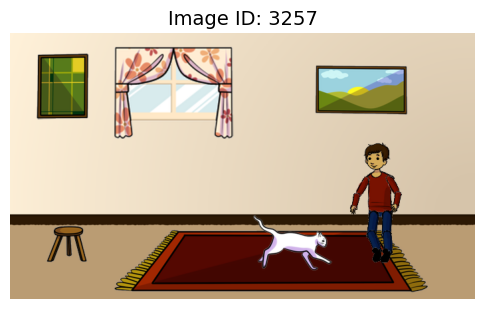

Questions associated with the image:

                        question question_type
Is this cat considered bad luck?       is this
         Is anyone on the stool?     is anyone
  Is the cat running to the boy?    is the cat


In [ ]:
sample_row = df_train.sample(1).iloc[0]
img_id = sample_row["image_id"]
img_path = os.path.join(IMAGE_DIR_TRAIN, f"abstract_v002_train2015_{img_id:012d}.png")

img = Image.open(img_path)
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis("off")
plt.title(f"Image ID: {img_id}", fontsize=14)
plt.show()

related_questions = df_train[df_train["image_id"] == img_id][["question", "question_type"]]
print("Questions associated with the image:\n")
print(related_questions.to_string(index=False))


# 8. Multiple Choice Answers per Question given by annotators

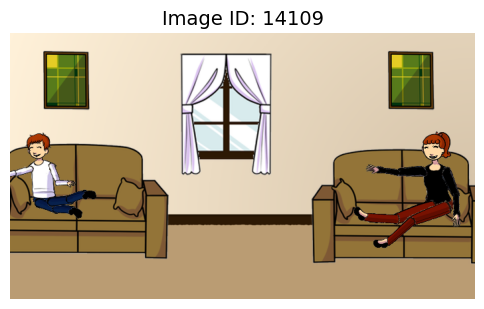

Question: Are they sitting on the same couch?

Multiple Choice Options:
 - blue
 - yes
 - birthday
 - yellow
 - white
 - 2
 - bathroom
 - in woman's hands
 - red
 - sitting
 - 4
 - 1
 - no
 - super mario bros
 - evening
 - 3
 - apple
 - sitting on stool


<ipython-input-81-0c245c76ef95>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(mcq_freq.keys()), y=list(mcq_freq.values()), palette="pastel")


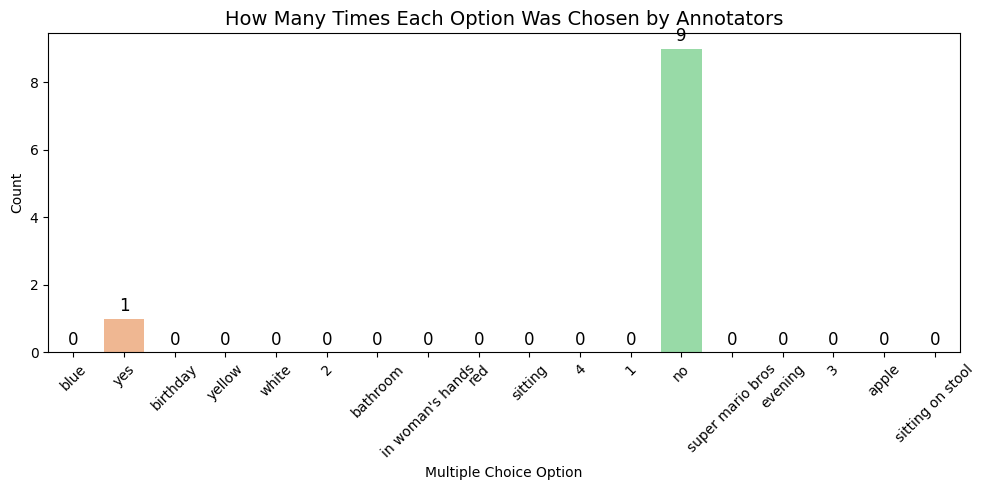

In [ ]:
import collections

# Sample a row
sample_row = df_questions_train.sample(1).iloc[0]
img_id = sample_row["image_id"]
q_id = sample_row["question_id"]
img_path = os.path.join(IMAGE_DIR_TRAIN, f"abstract_v002_train2015_{img_id:012d}.png")

# Display image
img = Image.open(img_path)
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis("off")
plt.title(f"Image ID: {img_id}", fontsize=14)
plt.show()

# Print question and options
question_row = df_questions_train[df_questions_train["question_id"] == q_id].iloc[0]
print(f"\033[1mQuestion:\033[0m {question_row['question']}\n")
print("Multiple Choice Options:")

for option in question_row["multiple_choices"]:
    print(f" - {option}")


# Get annotation (answers given by annotators)
annotation_row = df_answers_train[df_answers_train["question_id"] == q_id].iloc[0]
all_answers = annotation_row["answers"]

# Count each answer from the annotators
answer_counts = collections.Counter([ans.lower().strip() for ans in annotation_row["answers"]])

# Show frequency of each multiple choice answer
mcq_options = question_row["multiple_choices"]
mcq_freq = {opt: answer_counts.get(opt.lower(), 0) for opt in mcq_options}

# Visualize
plt.figure(figsize=(10, 5))
sns.barplot(x=list(mcq_freq.keys()), y=list(mcq_freq.values()), palette="pastel")
plt.title("How Many Times Each Option Was Chosen by Annotators", fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("Multiple Choice Option")
plt.ylabel("Count")
for i, val in enumerate(mcq_freq.values()):
    plt.text(i, val + 0.1, str(val), ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()


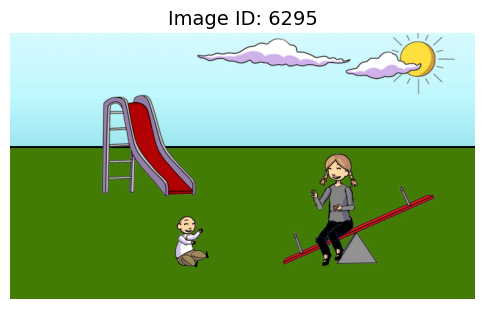

Question: How many clouds are in the sky?

Multiple Choice Answer: 2

Multiple Choice Options:
 - yes
 - under windows
 - blue
 - no
 - yellow
 - 4
 - 8
 - red
 - 6
 - holding them out
 - pigeon
 - 3
 - 2
 - 1
 - 1000
 - backwards
 - catch cat
 - white

All Answers (from annotators):
 - 2
 - 2
 - 2
 - 2
 - 2
 - 2
 - 2
 - 2
 - 2
 - 2


<ipython-input-79-30cda8516287>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(mcq_freq.keys()), y=list(mcq_freq.values()), palette="pastel")


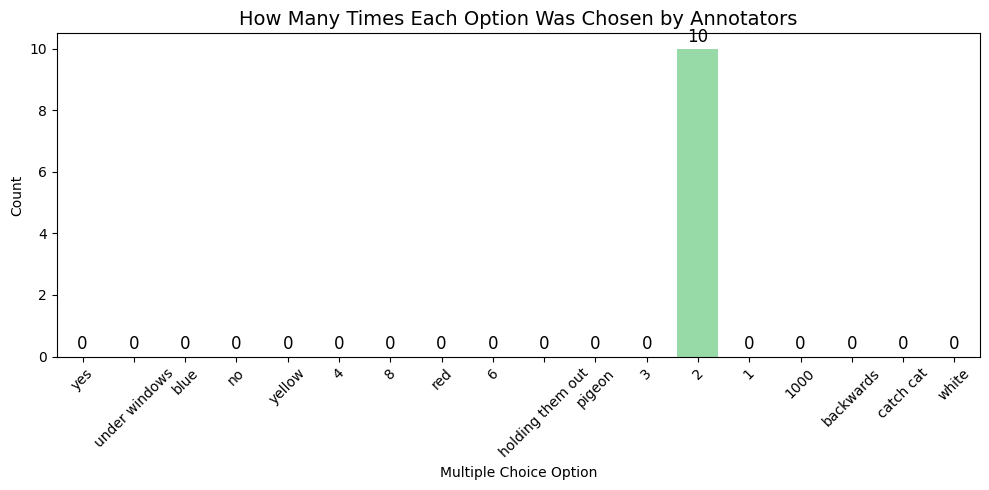

In [ ]:
import collections

# Sample a row
sample_row = df_questions_train.sample(1).iloc[0]
img_id = sample_row["image_id"]
q_id = sample_row["question_id"]
img_path = os.path.join(IMAGE_DIR_TRAIN, f"abstract_v002_train2015_{img_id:012d}.png")

# Display image
img = Image.open(img_path)
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis("off")
plt.title(f"Image ID: {img_id}", fontsize=14)
plt.show()

# Print question and options
question_row = df_questions_train[df_questions_train["question_id"] == q_id].iloc[0]
print(f"\033[1mQuestion:\033[0m {question_row['question']}\n")

# Get the multiple-choice answer for this question from df_train
multiple_choice_answer = df_train.loc[df_train['question_id'] == q_id, 'multiple_choice_answer'].iloc[0]
print(f"Multiple Choice Answer: {multiple_choice_answer}\n")  # Print the multiple-choice answer

print("Multiple Choice Options:")
for option in question_row["multiple_choices"]:
    print(f" - {option}")

# Get annotation (answers given by annotators)
annotation_row = df_answers_train[df_answers_train["question_id"] == q_id].iloc[0]
all_answers = annotation_row["answers"]

print("\nAll Answers (from annotators):")
for answer in all_answers:
    print(f" - {answer}")


# Count each answer from the annotators
answer_counts = collections.Counter([ans.lower().strip() for ans in annotation_row["answers"]])

# Show frequency of each multiple choice answer
mcq_options = question_row["multiple_choices"]
mcq_freq = {opt: answer_counts.get(opt.lower(), 0) for opt in mcq_options}

# Visualize
plt.figure(figsize=(10, 5))
sns.barplot(x=list(mcq_freq.keys()), y=list(mcq_freq.values()), palette="pastel")
plt.title("How Many Times Each Option Was Chosen by Annotators", fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("Multiple Choice Option")
plt.ylabel("Count")
for i, val in enumerate(mcq_freq.values()):
    plt.text(i, val + 0.1, str(val), ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

Calculate Average Annotator Answers per Question

If most questions have 1–2 unique answers, annotators generally agree.

If many have 4+ unique answers, the questions may be subjective or confusing.

Average number of unique annotator answers per question: 2.39


<ipython-input-18-738ba7606d3b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="num_unique_answers", data=df_train, palette="coolwarm")


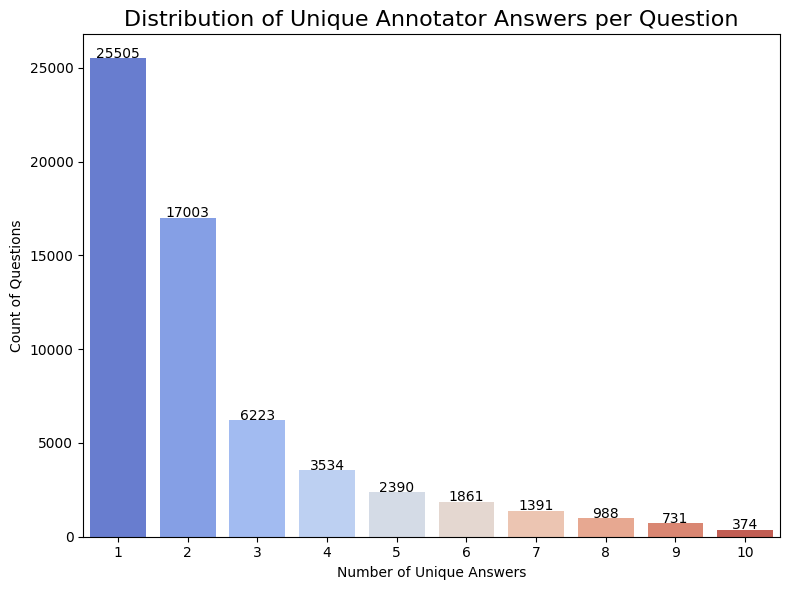

In [ ]:
# Function to count unique answers per question
df_train["num_unique_answers"] = df_train["answers"].apply(lambda x: len(set(x)))

# Average number of unique answers across all questions
average_unique_answers = df_train["num_unique_answers"].mean()

print(f"Average number of unique annotator answers per question: {average_unique_answers:.2f}")

plt.figure(figsize=(8, 6))
sns.countplot(x="num_unique_answers", data=df_train, palette="coolwarm")
plt.title("Distribution of Unique Annotator Answers per Question", fontsize=16)
plt.xlabel("Number of Unique Answers")
plt.ylabel("Count of Questions")

# Add count labels
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width()/2., height + 20, int(height), ha="center", fontsize=10)

plt.tight_layout()
plt.show()
